In [9]:
from constants import base_path
import geopandas
from phe import load_geoms


In [10]:
city_geoms = geopandas.read_file(
        base_path /
        "Major_Towns_and_Cities__December_2015__Boundaries-shp" /
        "Major_Towns_and_Cities__December_2015__Boundaries.shp"
    ).to_crs("EPSG:3857")
ltla_geoms = load_geoms()

In [52]:
city_geoms[city_geoms['TCITY15NM'].isin(["London", "Reading"])].iloc[0].geometry.centroid.coords[0][0]

-14138.752095618784

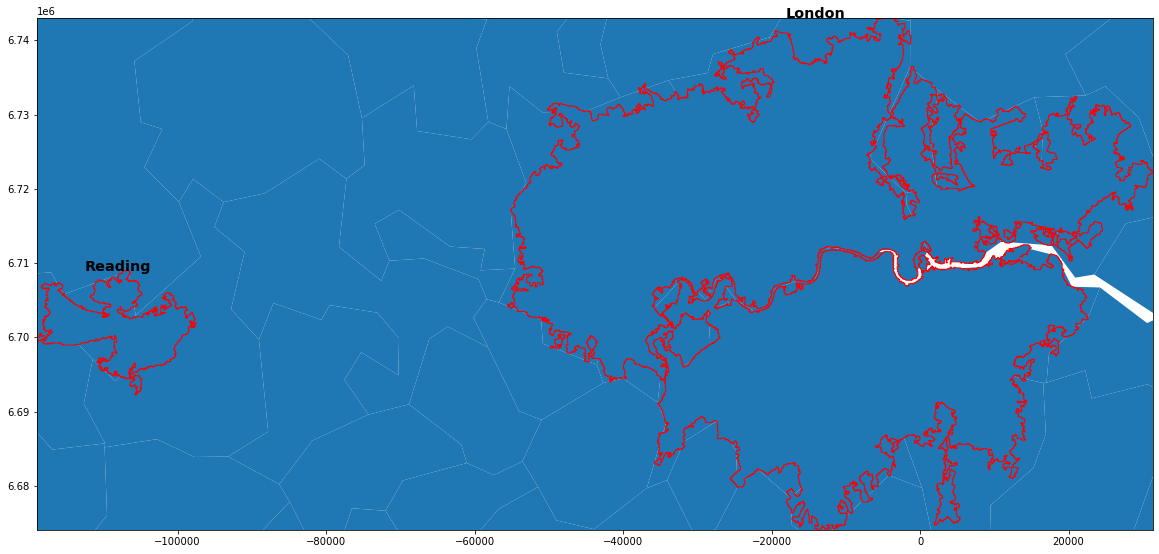

In [54]:
to_show = city_geoms[city_geoms['TCITY15NM'].isin(["London", "Reading"])]
minx, miny, maxx, maxy = to_show.geometry.total_bounds
ax = ltla_geoms.plot(figsize=(20,20))
to_show.plot(ax=ax, edgecolor='red')
ax.set_xlim(minx - .1, maxx + .1)
ax.set_ylim(miny - .1, maxy + .1)

def annotate(area):
    x = area.geometry.centroid.coords[0][0]
    y = area.geometry.bounds[-1]
    ax.annotate(
        area.TCITY15NM, 
        xy=(x, y), 
        ha='center',
        fontsize='x-large',
        fontweight=1000,
    )    

to_show.apply(annotate,axis=1);